<div style="display: flex; gap: 10px;">
  <img src="../images/HOOPS_AI.jpg" style="width: 20%;">

# HOOPS AI: EXPERIMENTAL - CAD VECTOR 
## Internal representation from GraphClassification Model

The `FlowInference` was extended to include a new method 'extract_embeddings' only available for the GraphClassification flow model.

These embeddings represents the internal representation of the neural net before the Prediction Head.
It is of size 'graph_emb' default to be 128.

For your custom training you could change that value in the FlowModel : GraphClassification(graph_emb_dim = 128).

these embeddings are generated fromt he supervised task during training menaing that they are expected to perform well on part similar to the parts the network was trained. 

In [1]:
import hoops_ai
import os

hoops_ai.set_license(os.getenv("HOOPS_AI_LICENSE"), validate= False)

In [2]:
import pathlib
from hoops_ai.cadaccess import HOOPSLoader
from hoops_ai.dataset import DatasetLoader 
from hoops_ai.ml.EXPERIMENTAL import GraphClassification, FlowInference


result_dir=pathlib.Path.cwd().joinpath("out","embeddings_inference")
trained_model_path = pathlib.Path.cwd().parent.joinpath("packages", "trained_ml_models", "ts3d_graphclassification_5k_10epochs.ckpt")

inference_model = FlowInference(cad_loader = HOOPSLoader(), flowmodel = GraphClassification(result_dir=result_dir))
inference_model.load_from_checkpoint(trained_model_path)

Successfully loaded model from checkpoint: C:\Users\LuisSalazar\MAIN\repos\HOOPS-AI-tutorials\packages\trained_ml_models\ts3d_graphclassification_5k_10epochs.ckpt


In [3]:

from hoops_ai.storage import CADFileRetriever, LocalStorageProvider
source_gasket = pathlib.Path.cwd().parent.joinpath("packages", "cadfiles", "fabwave","CAD_1_15_Classes", "Gasket", "STEP")

retriever = CADFileRetriever(
    storage_provider=LocalStorageProvider(directory_path=source_gasket),
    formats=[".stp", ".step"]
)
            
# Get files using the library's retriever
cad_files = retriever.get_file_list()
print(len(cad_files), "files found." )

73 files found.


In [4]:
ml_input = inference_model.preprocess(str(cad_files[0]))  
embeddings = inference_model.extract_embeddings(ml_input)
print(embeddings)

Preprocess time: 0.14491534233093262
Embedding extraction time: 0.03396010398864746
[[-0.63775903  0.58138865  0.16685818  0.19497435 -0.6442624   1.0088035
  -0.6902473  -0.03860405  0.43561354  0.19588274 -0.20293449  0.45875984
   0.20301083  0.20600274 -1.0080092  -0.21180965  0.33135623  0.05086527
   0.2781116   0.1274083  -0.34883147 -0.4751559   0.6310065   0.22268121
  -0.01352295  0.31270725  0.65414923  0.28027874 -0.08169801  0.38824904
  -0.03785419 -0.9211034   0.03113706 -0.62106395 -0.477047   -0.16074829
  -0.39268136 -1.2952353  -0.28005937  0.5812427  -0.8518143   0.04591893
  -0.00574973 -0.13237692 -0.4630446  -0.24687847  0.0360209  -0.21381399
  -0.16758972 -0.6152836   0.01996934  1.2037956  -0.00621955  0.20476696
   0.08042136 -0.10164844 -0.6935631  -0.2224743   0.48757035 -0.4150665
  -0.31077    -0.17201589  0.00391361  0.9936867   0.91356874  0.4823285
  -0.24391714 -0.3152264   0.8624427   1.1638721   0.43592247 -0.14282294
  -0.1263101   0.5685763  -0.39

## Install seaborn for this handy visualization trick
under the same conda environment:
```python
pip install seaborn
```

In [5]:
%pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.org/simple
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.7.2 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [6]:

import seaborn as sns # pip install seaborn [this is optional, only for visualization]
import matplotlib.pyplot as plt
import numpy as np

def create_embedding_barcode(embeddings, embed_len_thr=128, figsize=(5, 0.5), label='embedding'):
    """
    Create a barcode-like visualization from embedding values.
    
    Parameters:
    -----------
    embeddings : array-like
        The embedding values to visualize
    embed_len_thr : int, optional
        Maximum length of embeddings to display (default: 128)
    figsize : tuple, optional
        Figure size as (width, height) (default: (15, 1))
    label : str, optional
        Y-axis label for the barcode (default: 'embedding')
    
    Returns:
    --------
    None (displays the plot)
    """
    # Convert to numpy array and truncate if needed
    embedding_array = np.array(embeddings[:embed_len_thr])
    
    # Create heatmap
    sns.heatmap(embedding_array.reshape(-1, embed_len_thr),
                cmap="Greys", center=0, square=False, 
                xticklabels=False, cbar=False)
    
    # Set figure size and labels
    plt.gcf().set_size_inches(*figsize)
    plt.yticks([0.5], labels=[label])
    plt.show()

Preprocess time: 0.06601572036743164
Embedding extraction time: 0.022991180419921875


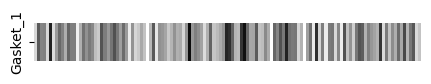

In [7]:
ml_input = inference_model.preprocess(str(cad_files[0]))  
embeddings = inference_model.extract_embeddings(ml_input)
create_embedding_barcode(embeddings= embeddings, label='Gasket_1')

Preprocess time: 0.09821867942810059
Embedding extraction time: 0.02397942543029785


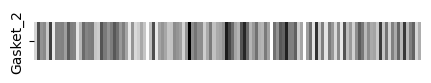

In [8]:
ml_input = inference_model.preprocess(str(cad_files[1]))  
embeddings = inference_model.extract_embeddings(ml_input)
create_embedding_barcode(embeddings= embeddings, label='Gasket_2')

## CAD Vector for a another file not similar to the previous ones

In [9]:
source_mitergear = pathlib.Path.cwd().parent.joinpath("packages", "cadfiles", "fabwave","CAD25-45_TOTAL1000", "Miter Gear Set Screw", "STEP")

retriever = CADFileRetriever(
    storage_provider=LocalStorageProvider(directory_path=source_mitergear),
    formats=[".stp", ".step"]
)
            
# Get files using the library's retriever
cad_files_2 = retriever.get_file_list()
print(len(cad_files_2), "files found." )

14 files found.


Preprocess time: 1.4150829315185547
Embedding extraction time: 0.08139181137084961


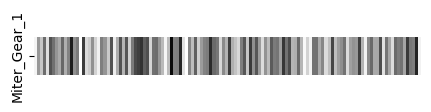

In [10]:
ml_input = inference_model.preprocess(str(cad_files_2[0]))  
embeddings = inference_model.extract_embeddings(ml_input)
create_embedding_barcode(embeddings= embeddings, label='Miter_Gear_1')